#PROJECT
Develop a machine learning model to predict the selling price of a used car based on its
technical specifications, usage history, and seller details.

#Load Dataset

In [472]:
import pandas as pd  #import lib

In [473]:
data = pd.read_csv("/content/car details v4.csv")  #Load dataset

In [474]:
#DATA EXPLORATION

In [475]:
df=data.copy()

In [476]:
df.head(5)

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0


In [477]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                2059 non-null   object 
 1   Model               2059 non-null   object 
 2   Price               2059 non-null   int64  
 3   Year                2059 non-null   int64  
 4   Kilometer           2059 non-null   int64  
 5   Fuel Type           2059 non-null   object 
 6   Transmission        2059 non-null   object 
 7   Location            2059 non-null   object 
 8   Color               2059 non-null   object 
 9   Owner               2059 non-null   object 
 10  Seller Type         2059 non-null   object 
 11  Engine              1979 non-null   object 
 12  Max Power           1979 non-null   object 
 13  Max Torque          1979 non-null   object 
 14  Drivetrain          1923 non-null   object 
 15  Length              1995 non-null   float64
 16  Width 

In [478]:
df.describe()

,Price,Year,Kilometer,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
count,2.059000e+03,2059.000000,2.059000e+03,1995.000000,1995.000000,1995.000000,1995.000000,1946.000000
mean,1.702992e+06,2016.425449,5.422471e+04,4280.860652,1767.991980,1591.735338,5.306266,52.002210
std,2.419881e+06,3.363564,5.736172e+04,442.458507,135.265825,136.073956,0.822170,15.110198
min,4.900000e+04,1988.000000,0.000000e+00,3099.000000,1475.000000,1165.000000,2.000000,15.000000
25%,4.849990e+05,2014.000000,2.900000e+04,3985.000000,1695.000000,1485.000000,5.000000,41.250000
50%,8.250000e+05,2017.000000,5.000000e+04,4370.000000,1770.000000,1545.000000,5.000000,50.000000
75%,1.925000e+06,2019.000000,7.200000e+04,4629.000000,1831.500000,1675.000000,5.000000,60.000000
max,3.500000e+07,2022.000000,2.000000e+06,5569.000000,2220.000000,1995.000000,8.000000,105.000000


In [479]:
# Vizualising relation of features with price (numeric features)
import matplotlib.pyplot as plt   # importing libraries
import seaborn as sns

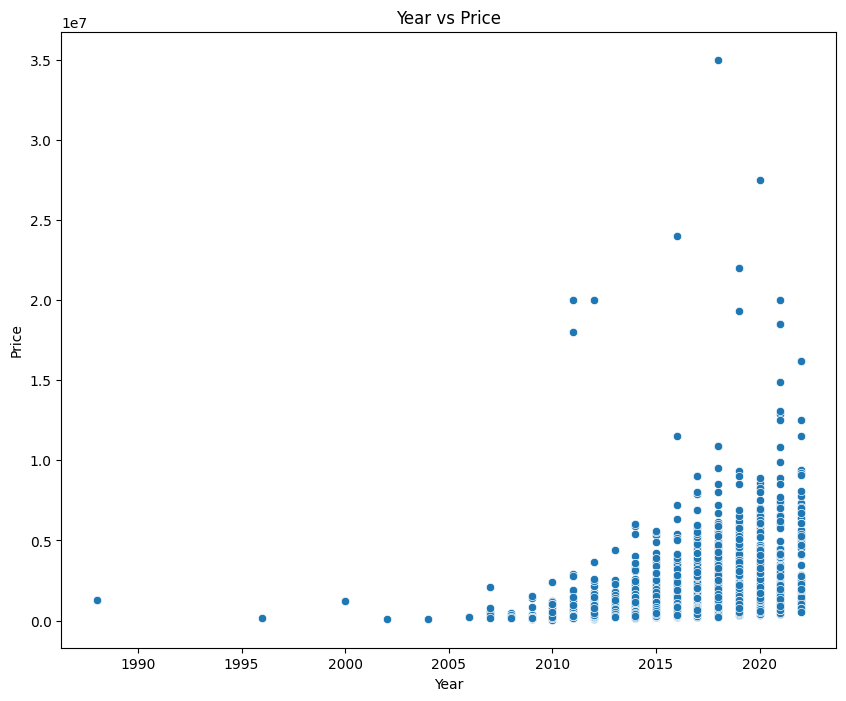

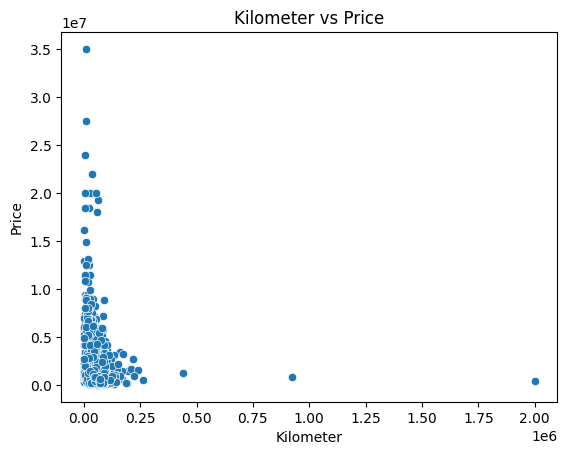

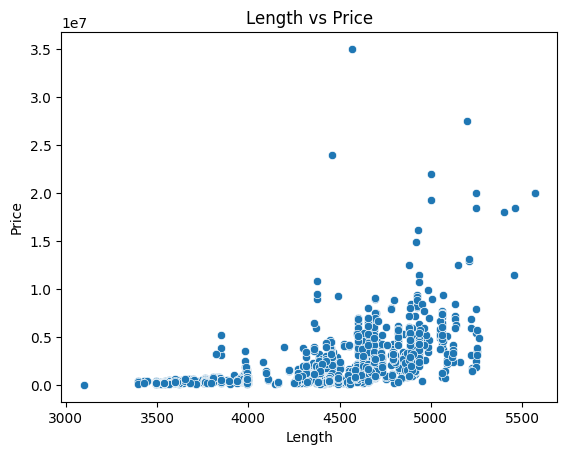

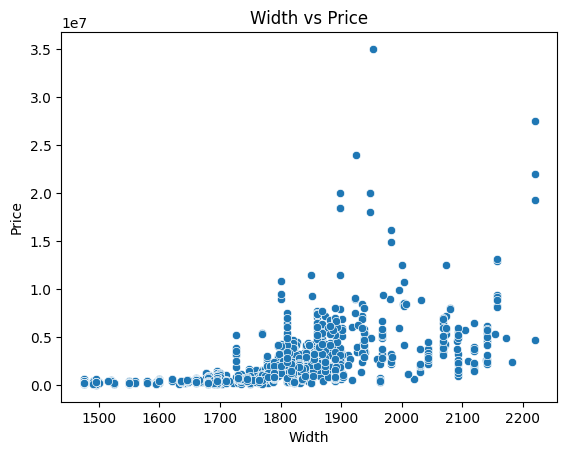

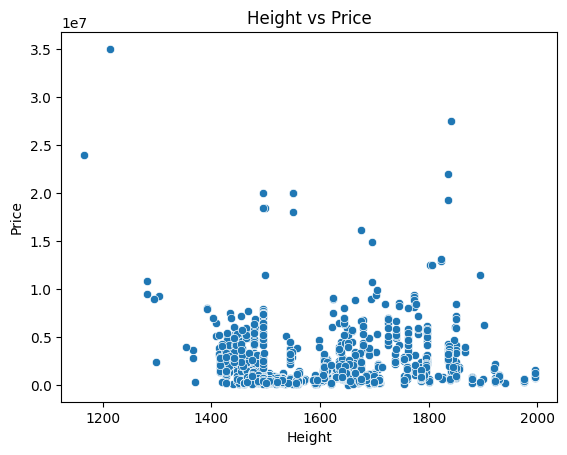

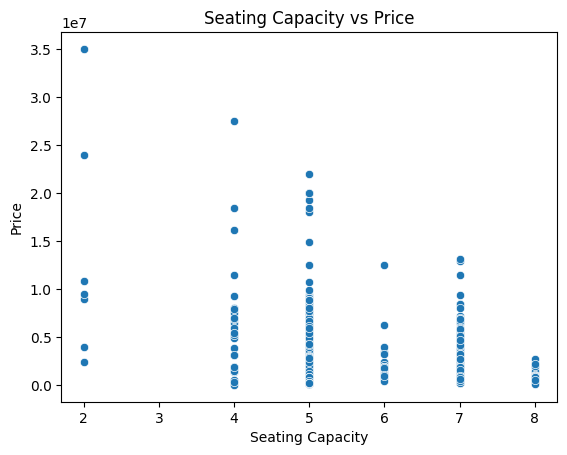

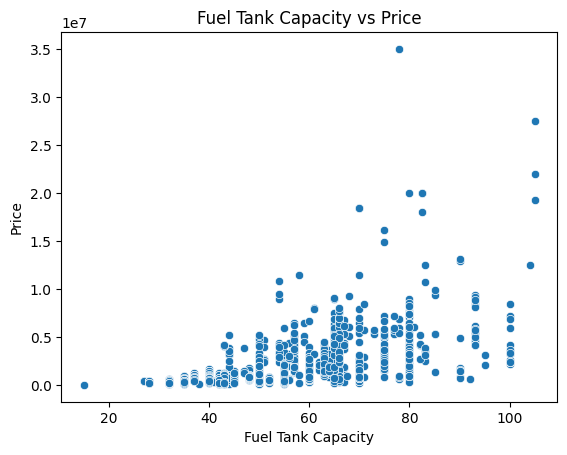

In [480]:
plt.figure(figsize=(10, 8))
cols = ['Year', 'Kilometer', 'Length', 'Width', 'Height',
       'Seating Capacity', 'Fuel Tank Capacity']
for col in cols:
    sns.scatterplot(x=col, y="Price", data=df)
    plt.title(f"{col} vs Price")
    plt.show()

Dataset Columns
The dataset contains the following attributes:

Our target is **Price** – Selling price of the car (in INR)

Also from above observations

• Make – Manufacturer of the car   -  Important to price because of brand value.

• Model – Model name of the car - Important to price because of variant and diffrence from base price.

• Year – Year of manufacture   - as recent the years price increases

• Kilometer – Distance travelled by the car (in km) - as km increases price decreases

• Fuel Type – Type of fuel used (Petrol, Diesel, CNG, Electric,
 etc.)

• Transmission – Manual or Automatic - Important to price, As changes in mechanisms.

• Location – City or region where the car is listed - Important to price as different cities has different registration prices.

• Color – Exterior color of the car - Not significant as it is exterior factor

• Seller Type – Individual or Dealer - Important to price as dealer charges may vary

• Engine – Engine capacity (cc) - Important to price , larger engine higher price.

• Owner – Ownership status (First Owner, Second Owner, etc.) - Important to price as second ownership price would be less than first ownership.

• Max Power – Maximum power output - Important to price, higher power indicates high performance high price.

• Max Torque – Maximum torque output - Important to price. Usually higher torque higher price.

• Drivetrain – Type of drivetrain (FWD, RWD, AWD) - Important to price

• Length – Length of the car (mm) - as this increases price increases, but since model is present no significant influence in price

• Width – Width of the car (mm) -as this increases price increases, but since model is present no significant influence in price


• Height – Height of the car (mm) -as this increases price increases, but since model is present no significant influence in price


• Seating Capacity – Number of seats  - price is depedent on this variable.

• Fuel Tank Capacity – Fuel tank capacity (litres) - this increases price increases

# **PREPROCESSING STEPS**

## Step 1: Check if duplicates are present in the data set

In [481]:
# Find duplicates
df.duplicated().sum()

np.int64(0)

 #### --> No duplicates present in dataset

##Step 2: Check for any datatype error

from df.info() we can see that 'Engine','Max torque','Max Power' columns are given as an object but contents are numericals, but units are making it objects.

To correct that we will extract just the numerical values and exclude rpm rates from power and torque as they do not have significant influence on our target price.

In [482]:
# Define a function to extract the numerical values

import re          # importing regular expressions. It’s a built-in Python library that lets you search, match, split, and replace text using patterns
import numpy as np

def extract_number(x):
    ''' This function is used to extract the first numerical values from string'''
    try:
        # Convert to string (handles floats and NaN)
        x_str = str(x)
        # Find numbers
        number = re.findall(r'\d+\.?\d*', x_str)
        if number:
            return float(number[0])  # take the first number
        else:
            return np.nan  # if no number found
    except:
        return np.nan



In [483]:
# Extracting Max power
df['max_power_bhp'] = df['Max Power'].apply(extract_number)

In [484]:
# Extracting Max Torque
df['max_torque_Nm'] = df['Max Torque'].apply(extract_number)

In [485]:
# Extracting Engine value
df["Engine cc"] = df['Engine'].apply(extract_number)

In [486]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                2059 non-null   object 
 1   Model               2059 non-null   object 
 2   Price               2059 non-null   int64  
 3   Year                2059 non-null   int64  
 4   Kilometer           2059 non-null   int64  
 5   Fuel Type           2059 non-null   object 
 6   Transmission        2059 non-null   object 
 7   Location            2059 non-null   object 
 8   Color               2059 non-null   object 
 9   Owner               2059 non-null   object 
 10  Seller Type         2059 non-null   object 
 11  Engine              1979 non-null   object 
 12  Max Power           1979 non-null   object 
 13  Max Torque          1979 non-null   object 
 14  Drivetrain          1923 non-null   object 
 15  Length              1995 non-null   float64
 16  Width 

In [487]:
df.head(1)

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,...,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,max_power_bhp,max_torque_Nm,Engine cc
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,...,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0,87.0,109.0,1198.0


In [488]:
# CHANGING YEARS TO AGE  - Age of car would give more precise info about price than year of manufacturing
current_year = pd.Timestamp.today().year
df["Car_Age"] = current_year - df["Year"]


In [489]:
# dropping original srting columns
df = df.drop(columns=["Engine","Max Power","Max Torque","Year"])

In [490]:
df.head(1)

,Make,Model,Price,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,max_power_bhp,max_torque_Nm,Engine cc,Car_Age
0,Honda,Amaze 1.2 VX i-VTEC,505000,87150,Petrol,Manual,Pune,Grey,First,Corporate,FWD,3990.0,1680.0,1505.0,5.0,35.0,87.0,109.0,1198.0,9


## Step 3: Missing Values Handling

In [491]:
# Get percentage of missing values per column
df.isnull().mean()*100   # df.isnull()--> returns true if value is missing, df.isnull().mean() --> gives proportion of missing values per column, and *100 converts it into percentage

,0
Make,0.000000
Model,0.000000
Price,0.000000
Kilometer,0.000000
Fuel Type,0.000000
Transmission,0.000000
Location,0.000000
Color,0.000000
Owner,0.000000
Seller Type,0.000000


if % of missing values are :

0-1 -->   dropna(), imputation

1-40 -->  imputation - mean, median, mode

40-100 --> drop the column

Based on this we will perform mean, median, mode imputation for columns

In [492]:
# importing function  SimpleImputer from lib sklearn and module impute, we can use this function to perform imputation
from sklearn.impute import SimpleImputer

In [493]:
# divide numerical columns and categorical columns

num_cols = df.select_dtypes(exclude="object").columns
cat_cols = df.select_dtypes(include="object").columns

In [494]:
# Imputing numerical columns with median
num_imputer = SimpleImputer(strategy="median")

df[num_cols] = num_imputer.fit_transform(df[num_cols])

In [495]:
#imputing categorical columns with mode
cat_imputer = SimpleImputer(strategy="most_frequent")

df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

In [496]:
df.isnull().mean()*100  # verify if there are no more missing values

,0
Make,0.0
Model,0.0
Price,0.0
Kilometer,0.0
Fuel Type,0.0
Transmission,0.0
Location,0.0
Color,0.0
Owner,0.0
Seller Type,0.0


#### --> We have handled missing values with imputation

### Rearranging data
As few features are does not influence price, we will drop that

dropped columns are 'Colour','Height', 'Width','Length'

In [497]:
# Rearranging data for model training
ml_df = df[['Make', 'Model','Kilometer', 'Car_Age','Fuel Type','Transmission', 'Location', 'Owner', 'Seller Type','Engine cc','max_power_bhp','max_torque_Nm', 'Drivetrain','Seating Capacity', 'Fuel Tank Capacity','Price']]

In [498]:
ml_df.head(3)

,Make,Model,Kilometer,Car_Age,Fuel Type,Transmission,Location,Owner,Seller Type,Engine cc,max_power_bhp,max_torque_Nm,Drivetrain,Seating Capacity,Fuel Tank Capacity,Price
0,Honda,Amaze 1.2 VX i-VTEC,87150.0,9.0,Petrol,Manual,Pune,First,Corporate,1198.0,87.0,109.0000,FWD,5.0,35.0,505000.0
1,Maruti Suzuki,Swift DZire VDI,75000.0,12.0,Diesel,Manual,Ludhiana,Second,Individual,1248.0,74.0,190.0000,FWD,5.0,42.0,450000.0
2,Hyundai,i10 Magna 1.2 Kappa2,67000.0,15.0,Petrol,Manual,Lucknow,First,Individual,1197.0,79.0,112.7619,FWD,5.0,35.0,220000.0


## Step 4: Outlier Detection

In [499]:
 #divide numerical columns and categorical columns

num_cols_ml = ml_df.select_dtypes(exclude="object").columns
cat_cols_ml = ml_df.select_dtypes(include="object").columns

In [500]:
# Outliers detection using Visualization - Box plot

import matplotlib.pyplot as plt   # importing libraries
import seaborn as sns

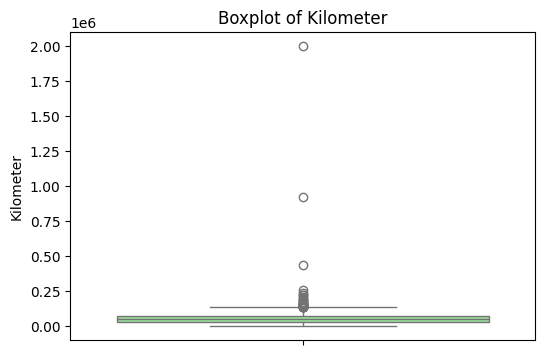

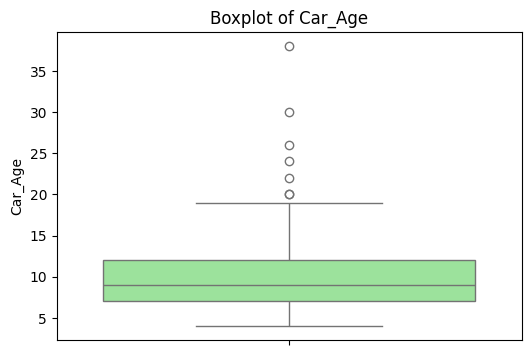

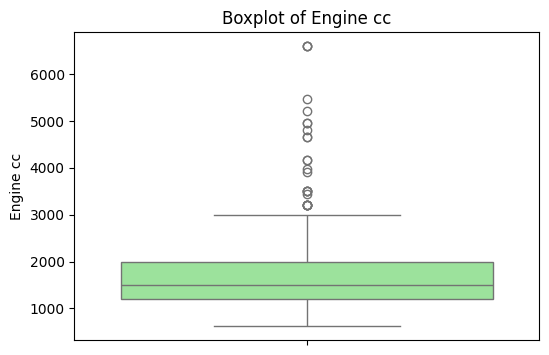

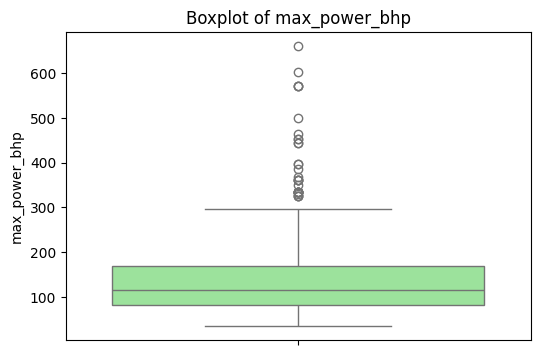

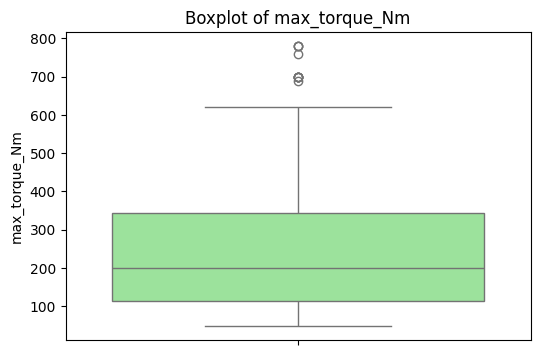

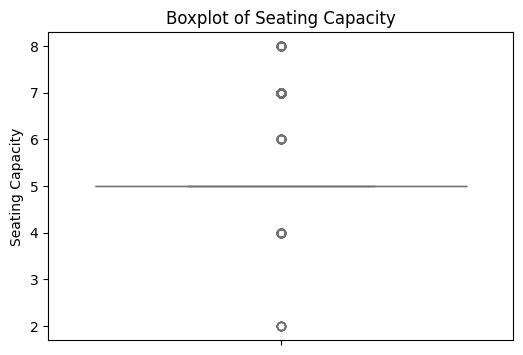

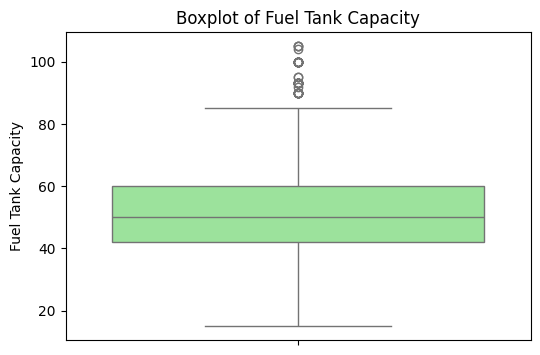

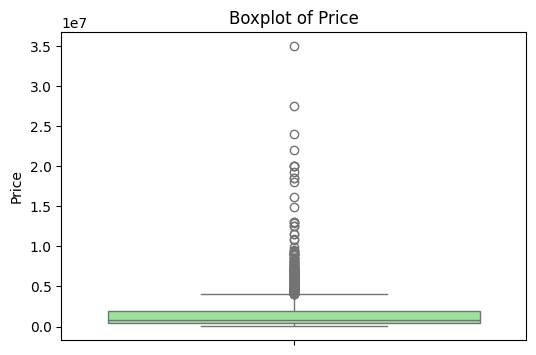

In [501]:
# Plotting box plots for Numerical columns
for col in num_cols_ml:
    plt.figure(figsize=(6,4))
    sns.boxplot(y=ml_df[col], color='lightgreen')
    plt.title(f'Boxplot of {col}')
    plt.show()

# Step 5: Outlier Handling

In [502]:
 # we have defined a function for capping outiers

def cap_outliers_numeric(df, numeric_cols):
    """
    Caps outliers in all numeric columns using 1.5*IQR method.
    Modifies the DataFrame in-place to avoid SettingWithCopyWarning.
    """
    for col in numeric_cols:                   #calculate IQR
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_limit = Q1 - 1.5 * IQR          #define limits
        upper_limit = Q3 + 1.5 * IQR

        # Use .loc to modify safely
        df.loc[:, col] = df[col].clip(lower_limit, upper_limit)   #Replace values

In [503]:
# calling the above defined function

cap_outliers_numeric(ml_df, num_cols_ml)

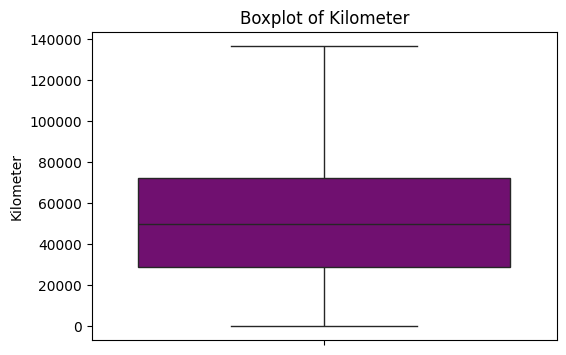

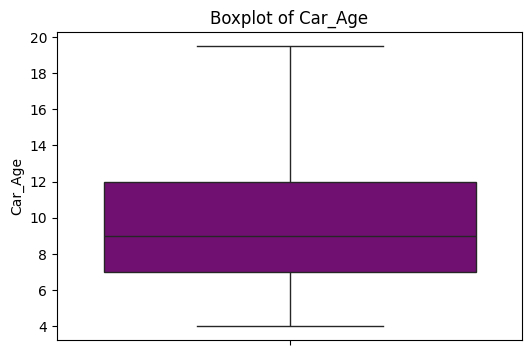

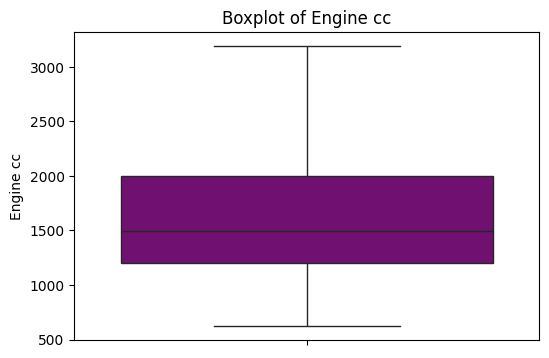

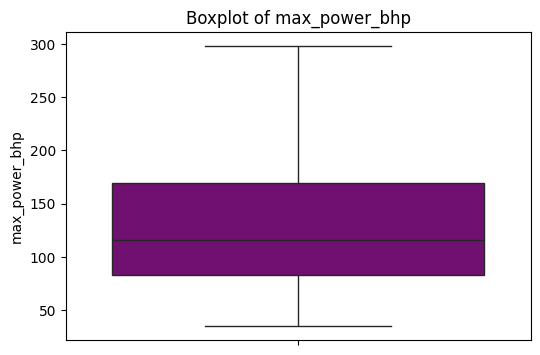

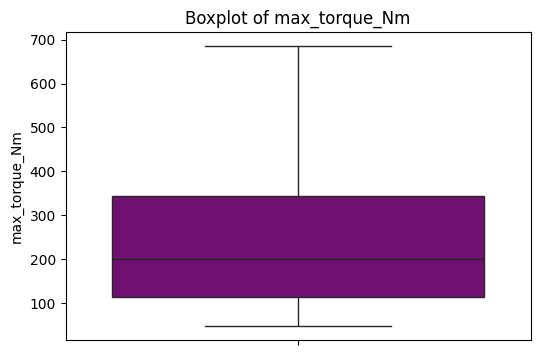

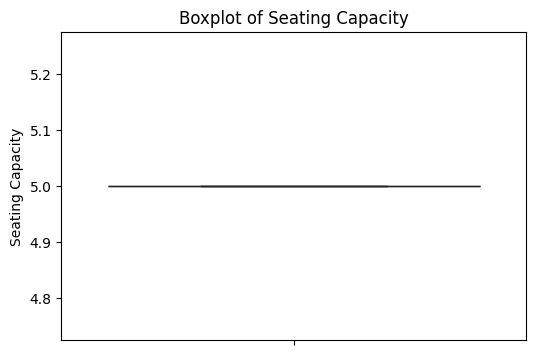

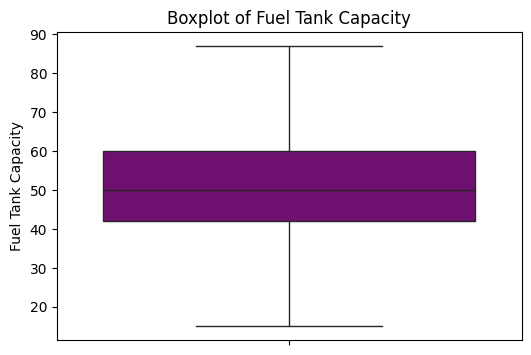

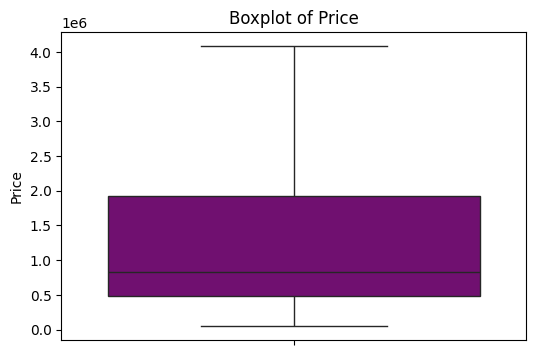

In [448]:
# verify if outliers are handled using box plots
for col in num_cols_ml:
    plt.figure(figsize=(6,4))
    sns.boxplot(y=ml_df[col], color='purple')
    plt.title(f'Boxplot of {col}')
    plt.show()

#### --> Outliers are handled, as points no longer lie beyond the whiskers.

## Step 6: Encoding

In [449]:
# we encode categorical columns
cat_cols_ml

Index(['Make', 'Model', 'Fuel Type', 'Transmission', 'Location', 'Owner',
       'Seller Type', 'Drivetrain'],
      dtype='object')

##One Hot Encoding

In [450]:
#Taking columns for one hot encoding
oe_cols= ['Fuel Type', 'Transmission', 'Owner',
       'Seller Type', 'Drivetrain']

In [451]:
# One-Hot Encoding
ml_df = pd.get_dummies(
    ml_df,
    columns=oe_cols,
    drop_first=True, dtype=int       #drop first removes  first column alphabetically ,  i.e Gender_Female is dropped
)

##Target Encoding

Features with high cardinality are target encoded

In [452]:
# Encoding location
# Calculate mean house price per location
mean_price_location = ml_df.groupby('Location')['Price'].mean()

# Map mean price back to new column
ml_df['Location_enc'] = ml_df['Location'].map(mean_price_location)

In [453]:
# Encoding Make
# Calculate mean house price per Make
mean_price_make = ml_df.groupby('Make')['Price'].mean()

# Map mean price back to new column
ml_df['Make_enc'] = ml_df['Make'].map(mean_price_make)

In [454]:
# Encoding Model
# Calculate mean house price per Model
mean_price_model = ml_df.groupby('Model')['Price'].mean()

# Map mean price back to new column
ml_df['Model_enc'] = ml_df['Model'].map(mean_price_model)

In [455]:
# dropping original columns
ml_df = ml_df.drop(columns=["Location","Make","Model"])

In [456]:
ml_df.head(2)

,Kilometer,Car_Age,Engine cc,max_power_bhp,max_torque_Nm,Seating Capacity,Fuel Tank Capacity,Price,Fuel Type_CNG + CNG,Fuel Type_Diesel,...,Owner_Second,Owner_Third,Owner_UnRegistered Car,Seller Type_Corporate,Seller Type_Individual,Drivetrain_FWD,Drivetrain_RWD,Location_enc,Make_enc,Model_enc
0,87150.0,9.0,1198.0,87.0,109.0,5.0,35.0,505000.0,0,0,...,0,0,0,1,0,1,0,1.607271e+06,622107.569620,505000.000000
1,75000.0,12.0,1248.0,74.0,190.0,5.0,42.0,450000.0,0,1,...,1,0,0,0,1,1,0,1.393830e+06,534799.956818,414714.214286


#### --> All categorical columns are encoded.

#Step 7: Scaling

We wil scale numerical features.
We do not scale target.

In [457]:
# perform scaling using function StandardScaler from library sklearn and module preprocessing
from sklearn.preprocessing import StandardScaler

scale_cols = ['Kilometer', 'Seating Capacity', 'Fuel Tank Capacity',       # do not scale target
       'max_power_bhp', 'max_torque_Nm', 'Engine cc', 'Car_Age']
scaler = StandardScaler()

ml_df[scale_cols] = scaler.fit_transform(ml_df[scale_cols])

#Final Data after processing

In [458]:
ml_df.head(5)

,Kilometer,Car_Age,Engine cc,max_power_bhp,max_torque_Nm,Seating Capacity,Fuel Tank Capacity,Price,Fuel Type_CNG + CNG,Fuel Type_Diesel,...,Owner_Second,Owner_Third,Owner_UnRegistered Car,Seller Type_Corporate,Seller Type_Individual,Drivetrain_FWD,Drivetrain_RWD,Location_enc,Make_enc,Model_enc
0,1.154298,-0.169704,-0.824923,-0.716688,-0.982915,0.0,-1.182617,505000.0,0,0,...,0,0,0,1,0,1,0,1.607271e+06,6.221076e+05,5.050000e+05
1,0.751534,0.750228,-0.737840,-0.947358,-0.392506,0.0,-0.686491,450000.0,0,1,...,1,0,0,0,1,1,0,1.393830e+06,5.348000e+05,4.147142e+05
2,0.486339,1.670161,-0.826665,-0.858639,-0.955495,0.0,-1.182617,220000.0,0,0,...,0,0,0,0,1,1,0,9.301667e+05,7.232635e+05,2.931250e+05
3,-0.491566,-0.782992,-0.826665,-0.805408,-0.953759,0.0,-1.040867,799000.0,0,0,...,0,0,0,0,1,1,0,7.424000e+05,1.671742e+06,7.622500e+05
4,0.552638,-0.476348,1.256361,0.365686,0.722712,0.0,0.234886,1950000.0,0,1,...,0,0,0,0,1,0,1,1.464655e+06,1.671742e+06,1.927200e+06


# Model Development
Split the data into training and testing sets.

In [459]:
# Features
X=ml_df.drop(columns=["Price"])

In [460]:
X.head(2)

,Kilometer,Car_Age,Engine cc,max_power_bhp,max_torque_Nm,Seating Capacity,Fuel Tank Capacity,Fuel Type_CNG + CNG,Fuel Type_Diesel,Fuel Type_Electric,...,Owner_Second,Owner_Third,Owner_UnRegistered Car,Seller Type_Corporate,Seller Type_Individual,Drivetrain_FWD,Drivetrain_RWD,Location_enc,Make_enc,Model_enc
0,1.154298,-0.169704,-0.824923,-0.716688,-0.982915,0.0,-1.182617,0,0,0,...,0,0,0,1,0,1,0,1.607271e+06,622107.569620,505000.000000
1,0.751534,0.750228,-0.737840,-0.947358,-0.392506,0.0,-0.686491,0,1,0,...,1,0,0,0,1,1,0,1.393830e+06,534799.956818,414714.214286


In [461]:
#Target
y= ml_df["Price"]

In [462]:
y.head(2)

,Price
0,505000.0
1,450000.0


In [463]:
# Spliting data into train data and test data
from sklearn.model_selection import train_test_split  # using function train_test_split
X_train, X_test, y_train, y_test =train_test_split(X,y, random_state=42) #25% test 75% train random state for shuffled data

In [464]:
X_train.shape   #Returns the number of training samples and the number of input features.

(1544, 28)

In [465]:
X_test.shape #Returns the number of test samples and the number of input features

(515, 28)

In [466]:
y_train.shape #Returns the number of target values used for training.

(1544,)

In [467]:
y_test.shape #Returns the number of target values used for testing.

(515,)

##Train a regression model

In [468]:
#Supervied - Regression model
from sklearn.linear_model import LinearRegression

model = LinearRegression() # Linear Regression
model.fit(X_train, y_train)

LinearRegression()

In [469]:
# Predict
y_pred = model.predict(X_test)

y_test # actual answers
y_pred  # predicted, answers by the model

array([4093278.99028426,  818814.9174834 ,  711508.60994692,
        791243.166552  ,  804296.57611539,  319060.73268582,
       1060509.68888485, 2436329.41528071,  922397.90473959,
       3939875.94779107,  592350.23014243,  621002.59880984,
        774857.77033089, 4092973.4963155 ,  586478.56386055,
        358408.08881628,  805262.50494224,  608429.00334157,
       1870233.25297625,  432552.64104588, 4065154.38342272,
        574771.7411013 ,  611751.5386821 ,  401597.29829315,
        564660.06484731, 1968871.4393898 , 1024639.72833992,
       1130586.32321679, 1907140.15942636,  644703.49110677,
        762168.56498814, 4168724.38897943, 3994909.11241804,
        618579.26134675,  324427.69694808,  857475.57622046,
        371355.9914939 , 4005957.79519924,  356418.72234172,
       1232422.26965179,  717283.64754155,  291725.44581664,
       3980301.2172706 ,  300595.91459547,  566060.46178586,
       4057953.14115169, 2530023.23951471,  340903.36222375,
        547561.84366972,

In [470]:
#Compare
results = pd.DataFrame({
    "Actual (₹)": y_test.values,
    "Predicted (₹)": y_pred.astype(int)
})
results

,Actual (₹),Predicted (₹)
0,4085001.5,4093278
1,825000.0,818814
2,695000.0,711508
3,950000.0,791243
4,819999.0,804296
...,...,...
510,800000.0,853849
511,375000.0,410040
512,750000.0,780083
513,465000.0,451750


##Evaluate the model's performance

In [471]:
from sklearn.metrics import r2_score, mean_absolute_error
# Regression metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"\nR² Score: {r2:.4f}")
print(f"Mean Absolute Error: ₹{int(mae):,}")


R² Score: 0.9761
Mean Absolute Error: ₹108,708


R² Score = 0.9761
This indicates that the model explains 97.61% of the variance in car prices, showing a very strong relationship between the input features and the target variable. The model has excellent predictive power.

Mean Absolute Error (MAE) = ₹108,708
On average, the model's predicted car price differs from the actual price by ₹108,708, which suggests a low prediction error relative to typical car prices.

The high R² value combined with a relatively low MAE indicates that the model fits the data well and is capable of making accurate and reliable car price predictions